# Assignment 4
## Austin Peng
## CSC 241
--------------------

In [21]:
# IMPORTS
%matplotlib inline
import numpy as np
import math, sys
from pylab import *
from tqdm import tqdm
import time
style.use('seaborn-whitegrid')
rcParams['figure.figsize'] = [20, 8]

# A)
____

f(c, phi) where c=contrast, phi=orientation

delta phi = 90 degrees | So phi1=-45 phi2=45, phi1=0 phi2=90 etc

w is the same in #A

In [22]:
#1
n=100
k=1
f_max=20
f0=5

# method for pop. response f(c, phi) 
# THIS FUNCTION TAKES phi_I AS INPUT TO GENERATE VALUES FOR A SET phi OVER 0 TO PI
def population_response(c, phi_I):
    response = f0 + c* f_max * math.exp(k *( math.cos(2*(math.radians(phi) - phi_I)) - 1) )
    return response



# range
plot_range = np.linspace(0, math.pi, n)

C determines the height or strength of the population response.
As phi increases, the response curves shift towards the right. Phi affects the popluation responses horizontal orientation.

In [23]:
#2
# Need to create a 100x100 matrix with diagonal as f(c, phi) where c = 1 and phi goes from range (0 to pi) over 100 increments
# This is a sample of 100 neurons

C= np.zeros((100,100), dtype=float)
phi=0
count=0
for x in plot_range:
    C[count][count] = population_response(0,x) 
    count+=1

In [24]:
# C = 100x100 matrix from #2 but inverse
C_inverse=[]
for x in range(0,100):
    C_inverse.append(C[x] / (C[x][x]**2))
    
# convert back to np array
C_inverse = np.asarray(C_inverse)

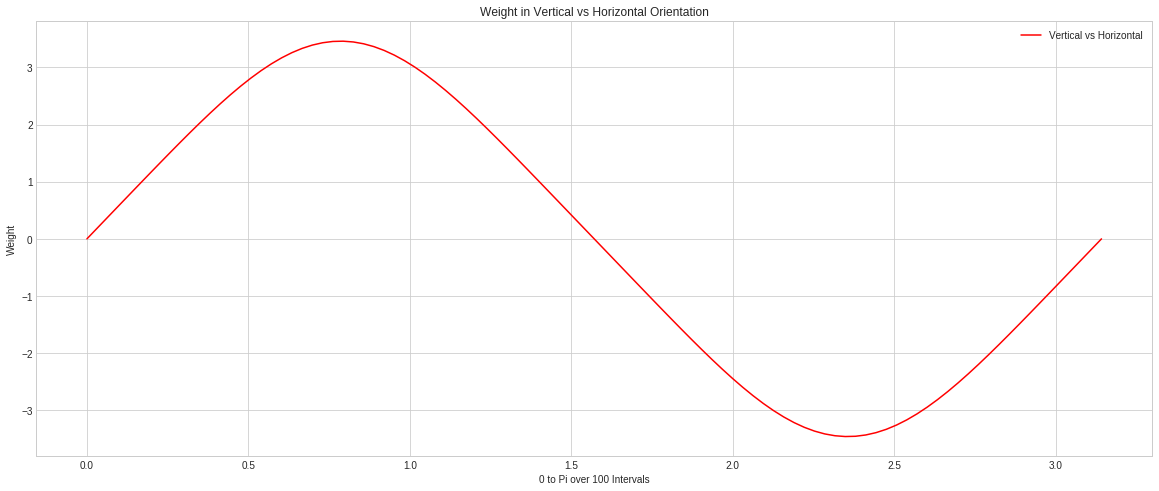

In [25]:
# Plotting at c=1

phi = 45
c=1
f1=[]
for y in plot_range:
    f1.append(population_response(c, y))
f1 = np.asarray(f1)    

phi = -45
f2=[]
for y in plot_range:
    f2.append(population_response(c, y))
f2 = np.asarray(f2)    


w = []
w.append( np.matmul(C_inverse, f1 - f2) ) 

# set as np array
w=np.asarray(w)
    
    
title("Weight in Vertical vs Horizontal Orientation")
xlabel("0 to Pi over 100 Intervals")
ylabel("Weight")
plot(plot_range, w[0], 'r', label='Vertical vs Horizontal')
legend(loc='upper right')
show()

# B)
____

r = poiss( f() )

d = W*r

10ms time bins till 1 second so run 100 times.

At each t, draw new r and sum all d up till that t. 

***Function f() is not varied, just gen new poiss***

Ex: for t = 3, d(3) = W*r(1) + W*r(2) + W*r(3) 

Ex: for t = 1, d(1) = W*r(1)

Percent Correct d:  [0.4]


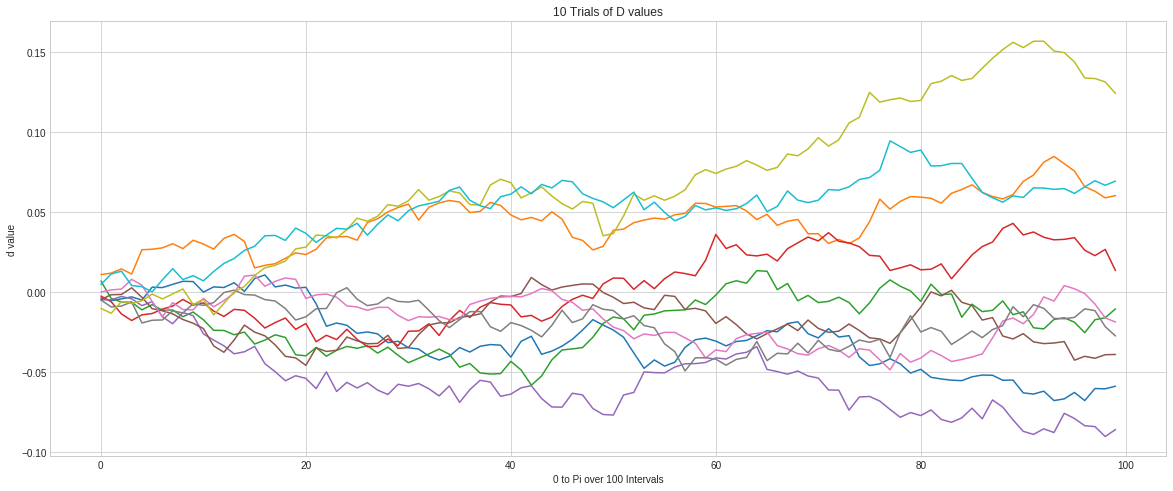

In [78]:
# 'f' values, where c=0

c=0.0001

phi = 45
f1=[]
for y in plot_range:
    f1.append(population_response(c, y))
f1 = np.asarray(f1)    

phi = -45
f2=[]
for y in plot_range:
    f2.append(population_response(c, y))
f2 = np.asarray(f2)    


w = []
w.append( np.matmul(C_inverse, f1 - f2) ) 


time_range=range(0,100)


# function to calc a new r value
def new_r():
    return np.random.poisson(f1)


def find_d():
    # create new list of d values
    d_list=[]
    for x in time_range:
        d_list.append(np.matmul(w[0], new_r() ))

    # bushwack summation loop
    d_summation=[]
    for x in time_range:
        if(x==0):
            d_summation.append(d_list[x])
        else:
            summation=0
            for y in range(0, x+1):
                summation+= d_list[x-y]
            d_summation.append(summation)
            
    return np.asarray(d_summation)



# method to check how many of the experiments resulted in d>0
def find_number_correct(trials):
    total=0
    for experiment in trials:
        # check last value
        if(experiment[99]>0):
            total+=1
    return total


d_experiments=[]
for x in range(0, 10):
    d_experiments.append(find_d())

    
# list to contain number correct for each experiment   
trial_correct_nums=[]  
trial_correct_nums.append(find_number_correct(d_experiments))
trial_correct_nums= np.asarray(trial_correct_nums)/10
print("Percent Correct d: ", trial_correct_nums)

title("10 Trials of D values")
xlabel("0 to Pi over 100 Intervals")
ylabel("d value")

for x in d_experiments:
    plot(time_range, x)

show()

# C)
____

C* = value of contrast where percent correct is 66%.
Find 66% correct level. If D>0 correct, else decision is wrong.

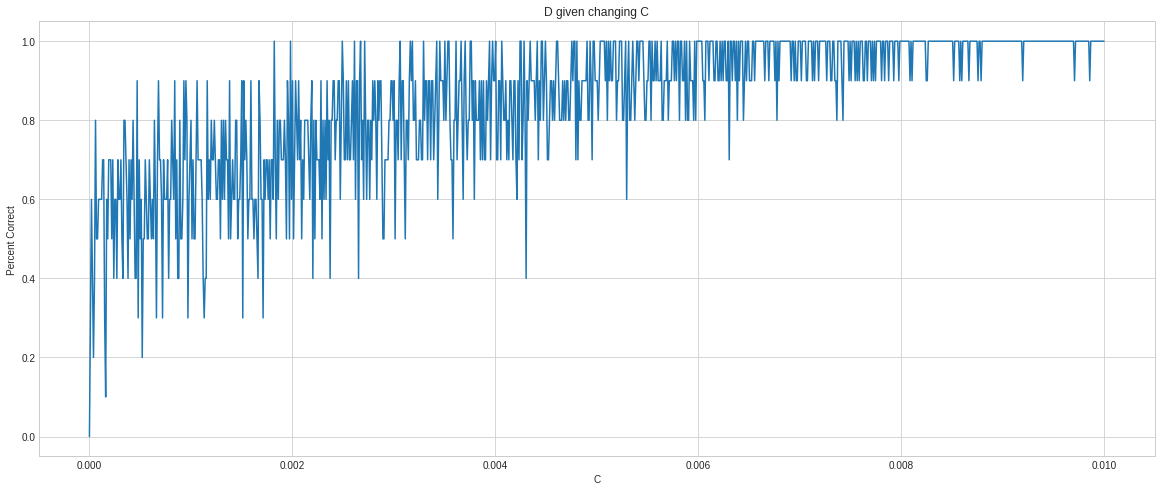

In [79]:
def d_for_diff_c(cstar):
    global c, phi, f1, f2, w
    c=cstar
    
    phi = 45
    f1=[]
    for y in plot_range:
        f1.append(population_response(c, y))
    f1 = np.asarray(f1)    

    phi = -45
    f2=[]
    for y in plot_range:
        f2.append(population_response(c, y))
    f2 = np.asarray(f2)    


    w = []
    w.append( np.matmul(C_inverse, f1 - f2) ) 

    time_range=range(0,100)

    def find_d():
        # create new list of d values
        d_list=[]
        for x in time_range:
            d_list.append(np.matmul(w[0], np.random.poisson(f1)))

        # bushwack summation loop
        d_summation=[]
        for x in time_range:
            if(x==0):
                d_summation.append(d_list[x])
            else:
                summation=0
                for y in range(0, x+1):
                    summation+= d_list[x-y]
                d_summation.append(summation)        

        return np.asarray(d_summation)


    # run 10 experiments for each c value
    d_experiments=[]
    for x in range(0, 10):
        d_experiments.append(find_d())
    
    
    # method to check how many of the runs in the experiment resulted in d>0
    def find_number_correct(experiments):
        total=0
        for experiment in experiments:
            # check last value
            if(experiment[99]>0):
                total+=1
        return total

    
    # list to contain number correct for each experiment   
    trial_correct_nums=[]  
    trial_correct_nums.append(find_number_correct(d_experiments))
    trial_correct_nums= np.asarray(trial_correct_nums)
    
    return trial_correct_nums



c_list=np.linspace(0, 0.01, 1000)
d_correct_varying_c=[]


# PERCENT CORRECT
# FOR EACH 10 runs, each run returns 1 or 0. Find on avg each 10 run is 67%


for c in c_list:
    results = d_for_diff_c(c)
    results = results/10
    d_correct_varying_c.append(results) 
    
    
title("D given changing C")
xlabel("C")
ylabel("Percent Correct")
plot(c_list, d_correct_varying_c)
show()

C* is about 2/3 percent correct around C= 0.0015

# D)
____

Psychometric function = (percent correct as a function of contrast c) 

Run loop from 0 to 3 * C*. Plot percentage correct (C*) over contrast.


In [96]:
def d_for_diff_c(cstar):
    global c, phi, f1, f2, w
    c=cstar
    
    phi = 45
    f1=[]
    for y in plot_range:
        f1.append(population_response(c, y))
    f1 = np.asarray(f1)    

    phi = -45
    f2=[]
    for y in plot_range:
        f2.append(population_response(c, y))
    f2 = np.asarray(f2)    


    w = []
    w.append( np.matmul(C_inverse, f1 - f2) ) 

    time_range=range(0,100)

    def find_d():
        # create new list of d values
        d_list=[]
        for x in time_range:
            d_list.append(np.matmul(w[0], np.random.poisson(f1)))

        # bushwack summation loop
        d_summation=[]
        for x in time_range:
            if(x==0):
                d_summation.append(d_list[x])
            else:
                summation=0
                for y in range(0, x+1):
                    summation+= d_list[x-y]
                d_summation.append(summation)        

        return np.asarray(d_summation)


    # SIMULATE 1000 Trials this time
    d_experiments=[]
    for x in range(0, 1000):
        d_experiments.append(find_d())
    
    # method to check how many of the runs in the experiment resulted in d>0
    def find_number_correct(experiments):
        total=0
        for experiment in experiments:
            # check last value
            if(experiment[99]>0):
                total+=1
        return total

    
    # list to contain number correct for each experiment   
    trial_correct_nums=[]  
    trial_correct_nums.append(find_number_correct(d_experiments))
    trial_correct_nums= np.asarray(trial_correct_nums)
    
    return trial_correct_nums


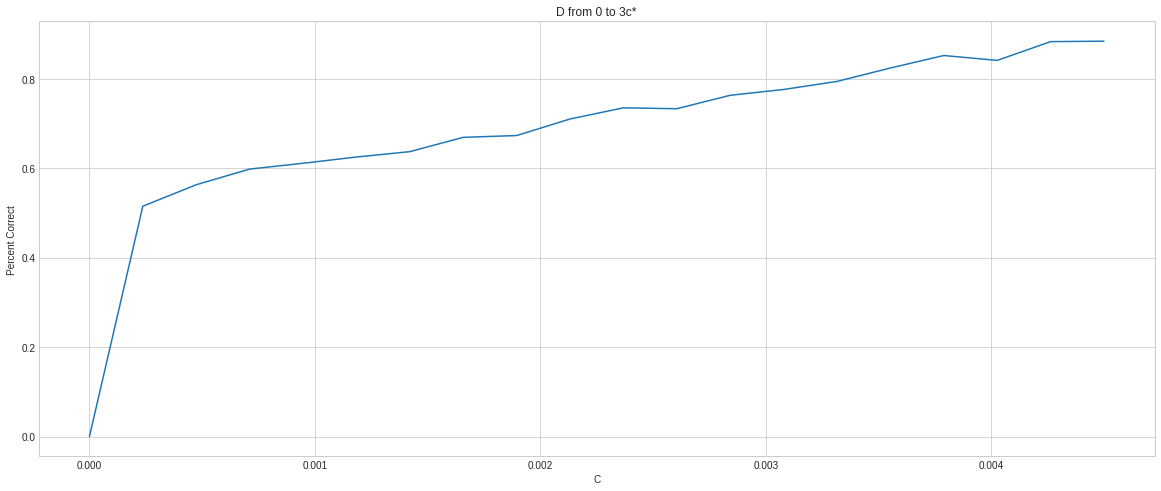

In [102]:
cstar = 0.0015

psych_range = np.linspace(0, 3*cstar, 20)
percent_d_correct_D=[]


for c in psych_range:
    results = d_for_diff_c(c)
    results = results/1000
    percent_d_correct_D.append(results) 
    
    
title("D from 0 to 3c*")
xlabel("C")
ylabel("Percent Correct")
plot(psych_range, percent_d_correct_D)
show()

Plot 1 sigma error bars.

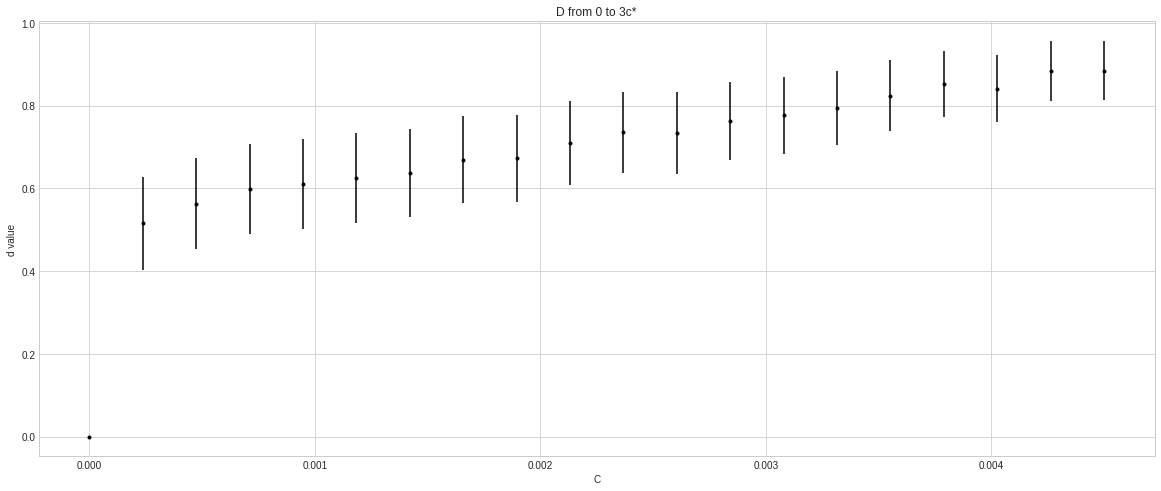

In [121]:
# CALCULATE NEW SIGMA FOR EACH NEW CONTRAST

percent_correct=np.asarray(percent_d_correct_D)


sigma=[]
for value in percent_correct:
    sigma.append( math.sqrt( (value* (1-value) ) / len(percent_correct) ) )

sigma = np.asarray(sigma)


title("D from 0 to 3c*")
xlabel("C")
ylabel("d value")
errorbar(psych_range, percent_d_correct_D, yerr= sigma, fmt='.k')
show()

Source: https://jakevdp.github.io/PythonDataScienceHandbook/04.03-errorbars.html

# E)
____

Find value B (bound) where about 3/4 of the trials have been made before t=1.

Bound = max value for d

Find value of of d (which will be the Bound) where the final decision is correct for 3/4 of the trials 

Plot a histogram of when reaction time hits the bound.

***reaction time is time where decision reaches the bound***

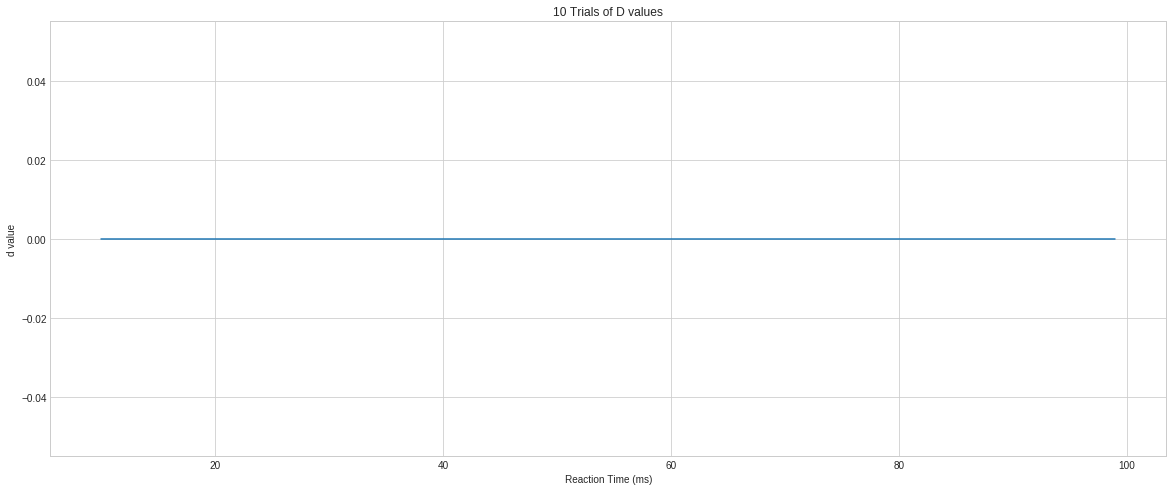

In [149]:
# Find Bound/Reaction Time where 3/4 is correct

def percent_correct_vary_T(T):
    global cstar
    c=cstar

    time_range=range(0,T)
    
    phi = 45
    f1=[]
    for y in plot_range:
        f1.append(population_response(c, y))
    f1 = np.asarray(f1)    

    phi = -45
    f2=[]
    for y in plot_range:
        f2.append(population_response(c, y))
    f2 = np.asarray(f2)    


    w = []
    w.append( np.matmul(C_inverse, f1 - f2) ) 


    # function to calc a new r value
    def new_r():
        return np.random.poisson(f1)


    def find_d():
        # create new list of d values
        d_list=[]
        for x in time_range:
            d_list.append(np.matmul(w[0], new_r() ))

        # bushwack summation loop
        d_summation=[]
        for x in time_range:
            if(x==0):
                d_summation.append(d_list[x])
            else:
                summation=0
                for y in range(0, x+1):
                    summation+= d_list[x-y]
                d_summation.append(summation)

        return np.asarray(d_summation)



    # method to check how many of the experiments resulted in d>0
    def find_number_correct(trials):
        total=0
        for experiment in trials:
            # check last value
            if(experiment[T-1]>0):
                total+=1
        return total


    d_experiments=[]
    for x in range(0, T):
        d_experiments.append(find_d())

    
    # list to contain number correct for each experiment   
    trial_correct_nums=[]  
    trial_correct_nums.append(find_number_correct(d_experiments))
    trial_correct_nums= np.asarray(trial_correct_nums)/T
    return trial_correct_nums
    

    
    
part_e=[]
for T in range(10, 100):
    part_e.append( percent_correct_vary_T(T) )
    

title("10 Trials of D values")
xlabel("Reaction Time (ms)")
ylabel("d value")

plot(range(10,100), part_e)

show()

Percent Correct d:  [0.8]


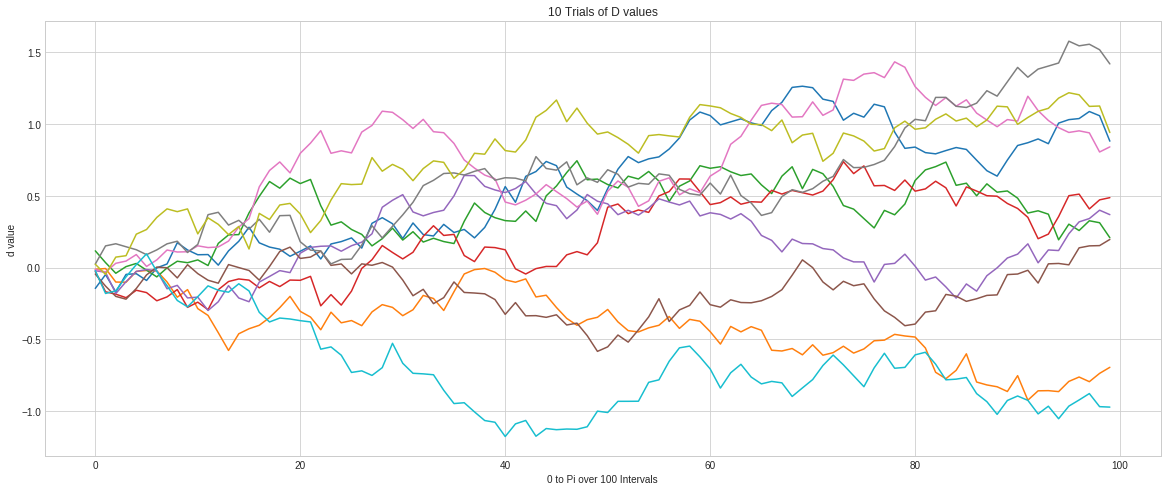

In [155]:
# 'f' values, where c=0

c=cstar

phi = 45
f1=[]
for y in plot_range:
    f1.append(population_response(c, y))
f1 = np.asarray(f1)    

phi = -45
f2=[]
for y in plot_range:
    f2.append(population_response(c, y))
f2 = np.asarray(f2)    


w = []
w.append( np.matmul(C_inverse, f1 - f2) ) 

T=100
time_range=range(0,T)


# function to calc a new r value
def new_r():
    return np.random.poisson(f1)


def find_d():
    # create new list of d values
    d_list=[]
    for x in time_range:
        d_list.append(np.matmul(w[0], new_r() ))
        
    return np.asarray(np.cumsum(d_list))



# method to check how many of the experiments resulted in d>0
def find_number_correct(trials):
    total=0
    for experiment in trials:
        # check last value
        if(experiment[T-1]>0):
            total+=1
    return total


d_experiments=[]
for x in range(0, 10):
    d_experiments.append(find_d())

    
# list to contain number correct for each experiment   
trial_correct_nums=[]  
trial_correct_nums.append(find_number_correct(d_experiments))
trial_correct_nums= np.asarray(trial_correct_nums)/10
print("Percent Correct d: ", trial_correct_nums)

title("10 Trials of D values")
xlabel("0 to Pi over 100 Intervals")
ylabel("d value")

for x in d_experiments:
    plot(time_range, x)

show()

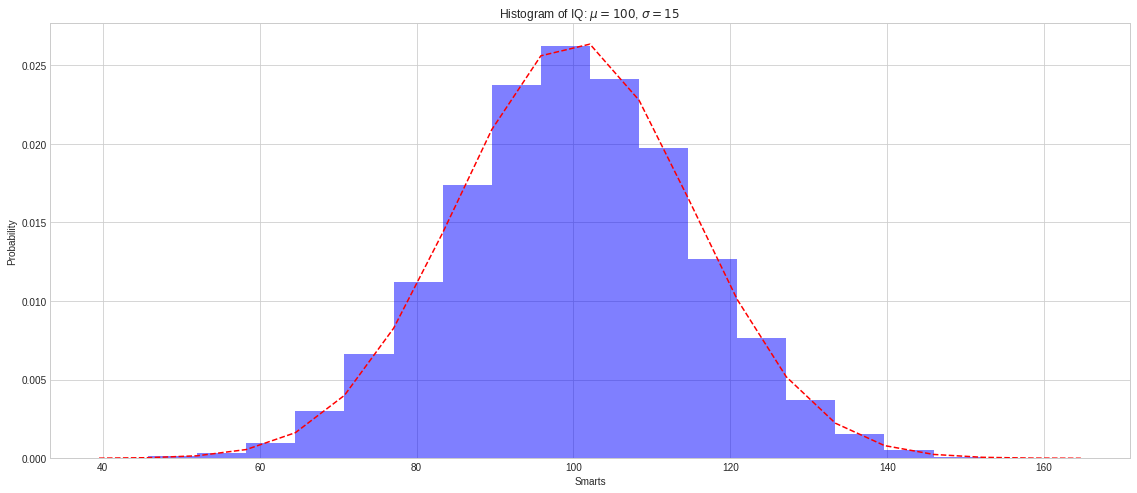

In [128]:
import scipy.stats

# example data
mu = 100 # mean of distribution
sigma = 15 # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)
 
    
    

num_bins = 20
# the histogram of the data
n, bins, patches = hist(x, num_bins, density=1, facecolor='blue', alpha=0.5)
 
# add a 'best fit' line
y = scipy.stats.norm.pdf(bins, mu, sigma)
plot(bins, y, 'r--')
xlabel('Smarts')
ylabel('Probability')
title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')
 
# Tweak spacing to prevent clipping of ylabel
subplots_adjust(left=0.15)
show()

# F)
____

F and G, baiscally part D but now with a bound we use to calc reaction times

# G)
____

# H)
____
Should be downwards slope, reaction time decreases as contrast decreases